In [0]:
# Import Libraries
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
spark = SparkSession.builder.getOrCreate()

In [0]:
tableBrand = spark.read.csv('MsBrand.csv',inferSchema=True, header=True)
tableCountry = spark.read.csv('MsCountry.csv',inferSchema=True, header=True)
tableCustomer = spark.read.csv('MsCustomer.csv',inferSchema=True, header=True)
tableRamen = spark.read.csv('MsRamen.csv',inferSchema=True, header=True)
tableRamenStyle = spark.read.csv('MsRamenStyle.csv',inferSchema=True, header=True)
tableTransactionDetail = spark.read.csv('TransactionDetail.csv',inferSchema=True, header=True)
tableTransactionHeader = spark.read.csv('TransactionHeader.csv',inferSchema=True, header=True)

In [15]:
tableBrand.show()
tableCountry.show()
tableCustomer.show()
tableRamen.show()
tableRamenStyle.show()
tableTransactionDetail.show()
tableTransactionHeader.show()

+-------+----------------+---------------+
|BrandId|       BrandName|EstablishedYear|
+-------+----------------+---------------+
|      1|       New Touch|           2019|
|      2|        Just Way|           2010|
|      3|          Nissin|           2016|
|      4|         Wei Lih|           2011|
|      5|   Chings Secret|           2011|
|      6|   Samyang Foods|           2010|
|      7|         Acecook|           2010|
|      8|     Ikeda Shoku|           2017|
|      9|      Ripe n Dry|           2010|
|     10|            KOKA|           2017|
|     11|     Tao Kae Noi|           2010|
|     12|        Yamachan|           2017|
|     13|        Nongshim|           2012|
|     14|            TRDP|           2010|
|     15|        Binh Tay|           2011|
|     16|           Paldo|           2018|
|     17|Jackpot Teriyaki|           2013|
|     18|         Yum-Mie|           2011|
|     19|         MyKuali|           2015|
|     20|          Ottogi|           2014|
+-------+--

In [0]:
tableBrand.registerTempTable("tableBrand")
tableCountry.registerTempTable("tableCountry")
tableCustomer.registerTempTable("tableCustomer")
tableRamen.registerTempTable("tableRamen")
tableRamenStyle.registerTempTable("tableRamenStyle")
tableTransactionDetail.registerTempTable("tableTransactionDetail")
tableTransactionHeader.registerTempTable("tableTransactionHeader")

In [0]:
res = spark.sql("SELECT CountryName, COUNT(RamenId) AS RamenCount FROM tableCountry C JOIN tableRamen R on C.CountryId = R.CountryId GROUP BY CountryName ORDER BY RamenCount DESC LIMIT 5")
res = res.toPandas()

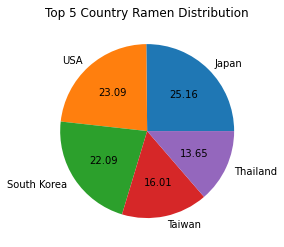

In [40]:
plt.title("Top 5 Country Ramen Distribution")
plt.pie(res['RamenCount'], labels=res['CountryName'],autopct= "%.2f")
plt.show()

#plt.axis("equal")
#plt.pie(exp_vals,labels=exp_labels, radius=1.5, autopct='%0.1f%%')
#plt.show()

#exp_vals = [23.09, 25.16, 22.09, 16.01, 13.65]
#exp_labels = ["USA", "JAPAN", "South Korea", "Taiwan", "Thailland"]

In [0]:
res1 = spark.sql("SELECT MONTH(TransactionDate) AS Month, FIRST(RamenPrice * Quantity) AS Profit FROM tableRamen R JOIN tableTransactionDetail TD ON R.RamenId = TD.RamenId JOIN tableTransactionHeader TH ON TH.TransactionId = TD.TransactionId WHERE YEAR(TransactionDate) LIKE 2019 GROUP BY Month ORDER BY Month")
res1 = res1.toPandas()

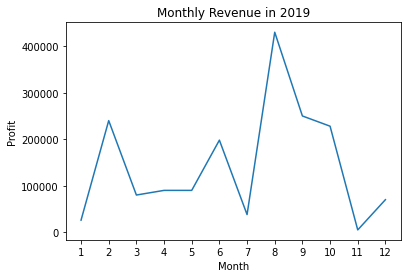

In [64]:
#plt 
#title
#x-label
#y-label

plt.plot(res1['Profit'])
plt.xticks(range(len(res1['Month'])), res1['Month'])
plt.title("Monthly Revenue in 2019")
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()



In [0]:
res2 = spark.sql("SELECT RamenStyleName, COUNT(R.RamenId) AS RamenCount FROM tableRamenStyle RS JOIN tableRamen R ON RS.RamenStyleId = R.RamenStyleId JOIN tableTransactionDetail TD ON R.RamenId = TD.RamenId GROUP BY RamenStyleName ORDER BY RamenCount DESC LIMIT 5")
res2 = res2.toPandas()

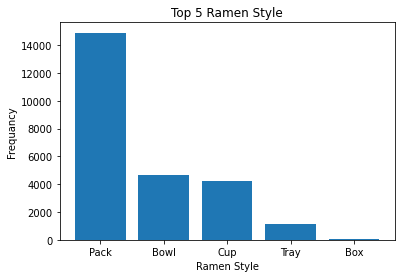

In [55]:
plt.bar(res2['RamenStyleName'], res2['RamenCount'])
plt.title("Top 5 Ramen Style")
plt.xlabel("Ramen Style")
plt.ylabel("Frequancy")
plt.show()

In [6]:
rom pyspark.ml.evaluation import BinaryClassificationEvaluator

SyntaxError: invalid syntax (<ipython-input-6-e486aded9fa6>, line 1)

In [7]:
from pyspark.sql.functions import when

In [8]:
from pyspark.ml.feature import VectorAssembler

In [9]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression

In [10]:
res3 = spark.sql("SELECT CustomerId, SUM(Quantity) AS Total FROM tableCustomer, (CASE ) C JOIN tableTransactionHeader TH ON C.CustomerId = TH.CustomerId JOIN tableTransactionDetail TD ON TH.TransactionId = TD.TransactionId")
res3 = res3.toPandas()

NameError: name 'spark' is not defined